In [1]:
%%HTML

<style>
td {
  font-size: 15px
}
th{
  font-size: 15px  
}
</style>

# Aspatial data manipulation: Numpy and Pandas



## Numpy

NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.
<br><br>

You can import the numpy library as shown below:
```python
import numpy as np
```

source: https://numpy.org/doc/stable/

In [2]:
import numpy as np

The core of the `numpy` package is the `array` class. Let's examine that first. We can make an array out of a sequence, like a list.

In [3]:
d = [1, 2, 3, 4, 5, 6]
np.array(d)

array([1, 2, 3, 4, 5, 6])

Note that arrays must be "homogeneous", unlike `list`, in that the data types of each element must be the same. The data type of the array is upcast to be able to represent all of the data. So, if only one element is a float, all elements will be converted to floats.

In [4]:
d = [1, 2, 3.1415, 4, 5, 6]
np.array(d)

array([1.    , 2.    , 3.1415, 4.    , 5.    , 6.    ])

Arrays are like multidimensional sequences. We can create a 2D array by supplying a list of lists as the argument.

In [5]:
arr = np.array([[1., 2., 3.,], [4., 5., 6.]])
print(arr.shape)
arr

(2, 3)


array([[1., 2., 3.],
       [4., 5., 6.]])

You can set the `array.shape` attribute to change the shape of the array. This attribute does not change the elements of the array, or how it is stored in memory, just how it is seen.

In [6]:
arr.shape = (3, 2)
print(arr.shape)
arr

(3, 2)


array([[1., 2.],
       [3., 4.],
       [5., 6.]])

---
### *Exercise*

1. Create an array, named `arr1`, that has value from 1 through 9. 
2. Assign `arr1` to `arr2` and resize the array into 3 by 3 (3 rows and 3 columns). 

---

In [7]:
# Your code here
arr1 = np.array(list(range(1, 10)))
arr2 = arr1.copy()
arr2.shape = (3, 3)
print(arr1)
print(arr2)


[1 2 3 4 5 6 7 8 9]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [8]:
""" Test code for the previous function. This cell should NOT give any errors when it is run."""

# Check your result here. 
assert np.array_equiv(arr1, np.array(list(range(1, 10))))
assert arr2.shape == (3,3)

print("Success!")

Success!


## Pandas

`pandas` is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It is built on top of `NumPy` and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.
<br><br>
You can import the `pandas` library as shown below:
```python
import pandas as pd
```
### Data Structure

| Diemensions | Name | Description | Usage |
| :-: | :-: | :-: | :-: |
| 1D | Series | 1D labeled homogeneously-typed array | pd.Series() |
| 2D | DataFrame | General 2D labeled, size-mutable tabular structure <br> with potentially heterogeneously-typed column | pd.DataFrame() |


source: https://pandas.pydata.org/docs/getting_started/overview.html

### Difference between Numpy and Pandas
| Comparision | Numpy | Pandas | 
| :-: | :-: | :-: |
| Input data | Preferable for Numerical data | Prefereable for Tabular data |
| Objects | Array | Data frame and Series |
| Efficiency | Memory efficient | Comsume more memory |
| Data size | Better performance for 50 K or less | Better performance for 500 K or more rows |
| Indexing | Very fast indexing | Relatively slow indexing |
| Data demension | Can represent up to 2D with DataFrame <br> Panel used to handle 3D data but deprecated in 0.24.0 | Multi-dimension data presentation <br> with multi-dimensional arrays (ndarray) |

source: https://www.geeksforgeeks.org/difference-between-pandas-vs-numpy/

In [9]:
import pandas as pd
pd.__version__ # Check your pandas version

'1.4.1'

## Mockup Analysis

Here is the narrative of our mockup analysis. 

### Problem statement:
Due to the lack and shortage of healthcare resources, many COVID-19 patients could not receive timely and adequate treatments, resulting in more fatality from the disease. 

### Goal of the analysis:
We as researchers suppose that insufficient healthcare availability causes more fatality from COVID-19, so we are investigating the relationship between the availability of insensitive care unit (ICU) beds and the case-fatality ratio of COVID-19. 

### Data employed: 
* (Daily collected) confirmed case and fatality of COVID-19 per county
* (Daily collected) available ICU beds count per Trauma Service Area (TSA*)
* Lookup table for counties associated with each TSA

\* TSAs are the regions aggregating 254 counties in Texas into 22 Regional Advisory Council that sets the guidelines for the trauma care system. <br>

![TSA Map in Texas](https://www.dshs.texas.gov/assets/0/76/110/783/8589936060/8589938383/554b3559-ab9d-4461-82e9-61b9ef17b4a4.jpg)

Data source: https://dshs.texas.gov/coronavirus/AdditionalData.aspx

### Steps
* Import and check the input data 
* Aggregate county-level data (daily confirmed cases and death) into Trauma Service Area (TSA) for the future comparison
* Compute 7-days moving mean
* Conduct a correlation analysis

## 1. Importing data
You can import existing dataset with the various formats, such as excel, csv, tsv, or json, but not limited to. <br> Check out https://pandas.pydata.org/docs/reference/io.html. <br>

#### Covered functions
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html> pd.read_excel() </a> <br>
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html> pd.read_csv() </a><br>
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.read_json.html> pd.read_json() </a><br>
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html?> df.astype() </a><br>
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html?> df.head() </a><br>
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html?> df.set_index() </a><br>


In [10]:
daily_death = pd.read_excel('./data/daily_death.xlsx') # read an excel file
daily_death = daily_death.set_index('County') # specify the index of this table so that we can call the value easily in the later computational process
daily_death = daily_death.astype(float) # change the data type of cells as float (from integer)
daily_death # this will call the instance of table

,06/01/2020,06/02/2020,06/03/2020,06/04/2020,06/05/2020,06/06/2020,06/07/2020,06/08/2020,06/09/2020,06/10/2020,...,12/22/2020,12/23/2020,12/24/2020,12/25/2020,12/26/2020,12/27/2020,12/28/2020,12/29/2020,12/30/2020,12/31/2020
County,,,,,,,,,,,,,,,,,,,,,
Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0
Andrews,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
Angelina,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,2.0,2.0,1.0,3.0,0.0,1.0,3.0,2.0,1.0,4.0
Aransas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
Archer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,1.0,0.0,3.0,2.0,0.0,1.0,1.0,0.0
Yoakum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Young,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0


In [11]:
daily_case = pd.read_csv('./data/daily_case.csv') # read a csv file
daily_case = daily_case.set_index('County')
daily_case.head(10) # df.head() function will call the top(n) rows

,06/01/2020,06/02/2020,06/03/2020,06/04/2020,06/05/2020,06/06/2020,06/07/2020,06/08/2020,06/09/2020,06/10/2020,...,12/22/2020,12/23/2020,12/24/2020,12/25/2020,12/26/2020,12/27/2020,12/28/2020,12/29/2020,12/30/2020,12/31/2020
County,,,,,,,,,,,,,,,,,,,,,
Anderson,0.0,37.0,0.0,17.0,9.0,1.0,0.0,1.0,4.0,5.0,...,39.0,43.0,47.0,42.0,9.0,0.0,88.0,32.0,40.0,20.0
Andrews,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,11.0,1.0,6.0,8.0,0.0,0.0,2.0,5.0,1.0
Angelina,1.0,0.0,0.0,53.0,16.0,6.0,0.0,3.0,24.0,17.0,...,21.0,37.0,37.0,170.0,22.0,0.0,17.0,53.0,40.0,92.0
Aransas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,3.0,3.0,2.0,5.0,0.0,5.0,9.0,3.0,5.0
Archer,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,4.0,9.0,15.0,2.0,4.0,0.0,4.0,8.0,11.0,9.0
Armstrong,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,5.0,0.0,0.0,0.0,2.0,0.0,0.0
Atascosa,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,...,35.0,18.0,21.0,37.0,37.0,0.0,15.0,29.0,48.0,19.0
Austin,0.0,0.0,0.0,8.0,0.0,0.0,0.0,2.0,0.0,0.0,...,11.0,9.0,11.0,29.0,12.0,1.0,10.0,15.0,5.0,12.0
Bailey,0.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,2.0,1.0,5.0,1.0


In [12]:
icu_empty = pd.read_csv('./data/icu_empty.tsv', sep='\t')  # we can also load tsv (tap seperated value) with read_csv() function
icu_empty = icu_empty.set_index('TSA')
icu_empty  # in case the table is not long enough, it will show the entire table. 

,06/01/2020,06/02/2020,06/03/2020,06/04/2020,06/05/2020,06/06/2020,06/07/2020,06/08/2020,06/09/2020,06/10/2020,...,12/22/2020,12/23/2020,12/24/2020,12/25/2020,12/26/2020,12/27/2020,12/28/2020,12/29/2020,12/30/2020,12/31/2020
TSA,,,,,,,,,,,,,,,,,,,,,
A,32.413793,30.769231,26.027397,30.496454,28.873239,27.205882,37.037037,33.333333,28.666667,27.702703,...,6.382979,6.878307,10.106383,8.556150,9.729730,7.936508,6.382979,5.376344,6.417112,9.803922
B,30.344828,18.556701,9.782609,19.186047,16.666667,22.093023,25.000000,26.923077,28.662420,29.192547,...,8.547009,8.189655,5.240175,6.849315,6.074766,6.542056,11.363636,10.958904,5.970149,8.962264
C,41.463415,41.463415,51.219512,43.243243,50.000000,31.645570,27.027027,40.000000,35.555556,34.090909,...,21.568627,28.571429,22.413793,15.254237,7.407407,6.779661,8.333333,11.111111,10.447761,7.812500
D,47.457627,33.333333,31.578947,36.842105,38.461538,44.067797,42.857143,46.551724,40.000000,41.463415,...,9.375000,7.812500,8.333333,5.000000,1.818182,5.660377,3.225806,3.225806,2.985075,0.000000
E,28.489284,26.805195,28.000000,25.536261,25.887802,24.527311,25.975539,26.022913,23.182067,21.724891,...,3.554041,4.322200,3.791930,4.750124,4.371316,4.079650,3.170732,3.004695,3.019213,2.957486
F,62.676056,66.911765,66.666667,66.187050,67.375887,70.138889,68.707483,66.447368,63.870968,62.406015,...,12.244898,9.708738,6.122449,24.107143,24.793388,7.291667,9.183673,7.142857,4.081633,5.000000
G,34.421365,28.075710,28.930818,27.812500,27.607362,28.571429,22.105263,34.848485,28.478964,24.000000,...,7.861635,10.216718,7.911392,7.073955,8.176101,5.882353,5.329154,6.153846,6.194690,8.554572
H,25.000000,15.942029,27.536232,26.086957,24.637681,22.388060,20.289855,24.657534,15.384615,13.043478,...,13.043478,18.666667,17.460317,22.388060,28.358209,30.985915,13.432836,11.428571,5.479452,14.062500
I,15.354331,14.671815,16.475096,17.692308,15.769231,16.226415,17.669173,14.393939,15.909091,13.186813,...,18.952618,20.437956,16.995074,18.537859,18.205128,19.346734,17.054264,13.404826,13.611111,13.687151


In [13]:
tsa_county = pd.read_json('./data/tsa_county.json') # load a json file
tsa_county.head() # df.head() function calls five rows as a default value

,FIPS,TSA,County
0,48011,A,Armstrong
1,48045,A,Briscoe
2,48065,A,Carson
3,48075,A,Childress
4,48087,A,Collingsworth


## 2. Aggregate county-level data into Trauma Service Area (TSA) 
Given that the COVID-19 related data is collected based on the county level and the ICU availability data is based on the TSA level, we need to match their spatial resolution. 

#### covered functions
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html> pd.DataFrame() </a> <br>
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.unique.html?> df.unique()</a> or <a href=https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html?> Series.unique() </a> <br>
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html?> df.columns </a> <br>
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html?> df.iterrows() </a> <br>
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.Series.to_list.html?> Series.to_list()</a><br>

### Method 1: create an empty dataframe and enter data for each row (maybe a verbose appraoch) 


In [14]:
# create an empty dataframe having TSA as the index and dates as column headers
daily_death_tsa = pd.DataFrame(index=tsa_county['TSA'].unique(), columns=daily_death.columns)
daily_death_tsa

,06/01/2020,06/02/2020,06/03/2020,06/04/2020,06/05/2020,06/06/2020,06/07/2020,06/08/2020,06/09/2020,06/10/2020,...,12/22/2020,12/23/2020,12/24/2020,12/25/2020,12/26/2020,12/27/2020,12/28/2020,12/29/2020,12/30/2020,12/31/2020
A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
for idx, row in daily_death_tsa.iterrows():  # iterating each row of the dataframe
    temp_list = tsa_county.loc[tsa_county['TSA'] == idx, 'County'].to_list() # Return associate county of TSA into a list
    daily_death_tsa.loc[idx] = daily_death.loc[temp_list].sum()  # Sum the value (death) of counties 
    
daily_death_tsa.head()

,06/01/2020,06/02/2020,06/03/2020,06/04/2020,06/05/2020,06/06/2020,06/07/2020,06/08/2020,06/09/2020,06/10/2020,...,12/22/2020,12/23/2020,12/24/2020,12/25/2020,12/26/2020,12/27/2020,12/28/2020,12/29/2020,12/30/2020,12/31/2020
A,1.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,...,4.0,5.0,5.0,5.0,6.0,5.0,8.0,3.0,13.0,4.0
B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,14.0,11.0,5.0,15.0,11.0,10.0,7.0,9.0,9.0,7.0
C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,11.0,6.0,3.0,3.0,3.0,2.0,5.0,8.0,6.0
D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,6.0,10.0,10.0,9.0,13.0,9.0,5.0,11.0,7.0,7.0
E,6.0,9.0,10.0,5.0,8.0,10.0,8.0,5.0,13.0,5.0,...,74.0,78.0,71.0,53.0,77.0,85.0,65.0,94.0,98.0,87.0


### Slicing dataframes
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html?> df.at </a>: Access a single value for a row/column label pair.
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html> df.loc </a>: Access a group of rows and columns by label(s).
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iat.html> df.iat </a>: Access a single value for a row/column pair by integer position.
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html> df.iloc </a>: Access a group of rows and columns by integer position(s).

In [16]:
daily_death_tsa.at['A', '06/01/2020']

1.0

In [17]:
daily_death_tsa.iat[0, 0]

1.0

In [18]:
daily_death_tsa.loc['A', ['06/01/2020', '06/02/2020', '06/03/2020']]

06/01/2020    1.0
06/02/2020    2.0
06/03/2020    2.0
Name: A, dtype: object

In [19]:
daily_death_tsa.iloc[0, 0:3]

06/01/2020    1.0
06/02/2020    2.0
06/03/2020    2.0
Name: A, dtype: object

---
### *Exercise*
1. Slice the fatality of July 4, 2020, in TSA Q, and assign the result as `df1`.
2. Sum the fatality between December 29, 2020, and December 31, 2020, in TSA E, and assign the result as `f1`.
---

In [20]:
# Your code here
df1 = daily_death_tsa.at['Q', '07/04/2020']
f1 = daily_death_tsa.loc['E', ['12/29/2020', '12/30/2020', '12/31/2020']].sum()

In [21]:
""" Test code for the previous function. This cell should NOT give any errors when it is run."""

# Check your result here. 
assert df1 == 34
assert f1 == 279

print("Success!")

Success!


### Method 2: using 'Groupby' function of dataframe
#### covered functions

* <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html> df.join() </a>
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html?> df.drop() </a>
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html?> df.groupby() </a>


In [22]:
# In order to use `groupby()` function, we need to have the TSA names in the dataframe. 
daily_case_tsa = daily_case.join(tsa_county.set_index('County')) # Join tsa_county table into daily_case table based on the index (Couunty)
daily_case_tsa = daily_case_tsa.drop(columns=['FIPS']) # Remove an uncessary column for groupby, which is FIPS code
daily_case_tsa

,06/01/2020,06/02/2020,06/03/2020,06/04/2020,06/05/2020,06/06/2020,06/07/2020,06/08/2020,06/09/2020,06/10/2020,...,12/23/2020,12/24/2020,12/25/2020,12/26/2020,12/27/2020,12/28/2020,12/29/2020,12/30/2020,12/31/2020,TSA
County,,,,,,,,,,,,,,,,,,,,,
Anderson,0.0,37.0,0.0,17.0,9.0,1.0,0.0,1.0,4.0,5.0,...,43.0,47.0,42.0,9.0,0.0,88.0,32.0,40.0,20.0,G
Andrews,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,1.0,6.0,8.0,0.0,0.0,2.0,5.0,1.0,J
Angelina,1.0,0.0,0.0,53.0,16.0,6.0,0.0,3.0,24.0,17.0,...,37.0,37.0,170.0,22.0,0.0,17.0,53.0,40.0,92.0,H
Aransas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,3.0,3.0,2.0,5.0,0.0,5.0,9.0,3.0,5.0,U
Archer,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,9.0,15.0,2.0,4.0,0.0,4.0,8.0,11.0,9.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wood,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,2.0,1.0,...,21.0,18.0,15.0,3.0,0.0,20.0,26.0,8.0,22.0,G
Yoakum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,1.0,B
Young,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,4.0,1.0,...,7.0,7.0,1.0,6.0,0.0,4.0,13.0,12.0,4.0,C


In [23]:
daily_case_tsa = daily_case_tsa.groupby(by='TSA').sum() # This function groups all the cells in the dataframe based on 'TSA' and return the sum.
daily_case_tsa

,06/01/2020,06/02/2020,06/03/2020,06/04/2020,06/05/2020,06/06/2020,06/07/2020,06/08/2020,06/09/2020,06/10/2020,...,12/22/2020,12/23/2020,12/24/2020,12/25/2020,12/26/2020,12/27/2020,12/28/2020,12/29/2020,12/30/2020,12/31/2020
TSA,,,,,,,,,,,,,,,,,,,,,
A,56.0,187.0,119.0,205.0,221.0,8.0,0.0,35.0,55.0,59.0,...,290.0,216.0,128.0,106.0,43.0,5.0,182.0,243.0,168.0,270.0
B,0.0,7.0,6.0,34.0,10.0,6.0,0.0,0.0,8.0,3.0,...,381.0,277.0,207.0,276.0,94.0,51.0,241.0,373.0,222.0,224.0
C,1.0,0.0,1.0,13.0,8.0,2.0,0.0,5.0,8.0,2.0,...,107.0,202.0,296.0,183.0,177.0,3.0,111.0,178.0,128.0,205.0
D,1.0,48.0,2.0,52.0,5.0,2.0,0.0,1.0,1.0,2.0,...,127.0,158.0,213.0,172.0,88.0,21.0,153.0,116.0,139.0,140.0
E,179.0,160.0,212.0,3047.0,918.0,389.0,122.0,329.0,1266.0,571.0,...,7272.0,6028.0,4510.0,3725.0,3644.0,4106.0,4195.0,9042.0,5323.0,6111.0
F,8.0,21.0,14.0,183.0,43.0,9.0,0.0,3.0,41.0,45.0,...,124.0,99.0,99.0,126.0,55.0,3.0,70.0,223.0,130.0,122.0
G,14.0,48.0,9.0,163.0,76.0,7.0,0.0,11.0,50.0,48.0,...,994.0,397.0,442.0,475.0,199.0,0.0,333.0,484.0,303.0,432.0
H,5.0,0.0,0.0,103.0,43.0,10.0,0.0,3.0,38.0,28.0,...,56.0,114.0,102.0,273.0,43.0,0.0,66.0,141.0,99.0,146.0
I,9.0,11.0,21.0,584.0,91.0,33.0,9.0,4.0,127.0,47.0,...,880.0,604.0,865.0,914.0,1114.0,0.0,66.0,508.0,41.0,249.0


## 3. Moving 7 days mean
Given the fact that the census is usually collected during the weekdays, we may want to smooth the temporal fluctuation to avoid the potential bias from the days that the census took place. 
#### covered functions

* <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?> df.plot() </a> or 
<a href=https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html> Series.plot() </a>
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html?> df.copy() </a>
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html?> df.fillna() </a>
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html?> df.transpose() </a>
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html?> df.shape </a>

import <a href=https://docs.python.org/3/library/datetime.html> datetime </a>, <a href=https://tqdm.github.io/> tqdm </a>
* <a href=https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior> datetime.datetime.strptime() </a>
* <a href=https://docs.python.org/3/library/datetime.html#datetime.timedelta> datetime.timedelta() </a>
* tqdm(df.iterrows(), total=df.shape[0])


<AxesSubplot:>

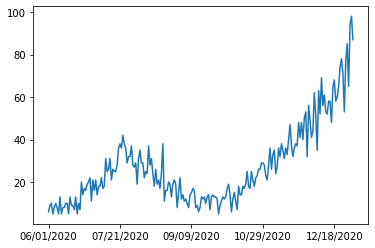

In [24]:
# Too much dynamic temporal fluctuation from the raw data
daily_death_tsa.loc['E'].plot()

<AxesSubplot:>

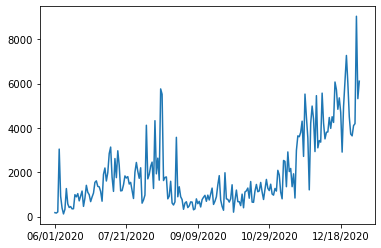

In [25]:
# Same here. 
daily_case_tsa.loc['E'].plot()

In [26]:
import datetime  # a package to manipulate date and time data

In [27]:
# First, we create a list that has all the target dates
from_date = '06/01/2020'
to_date = '12/31/2020'

start_date = datetime.datetime.strptime(from_date, "%m/%d/%Y")  # Function to change inputs from string to datetime
end_date = datetime.datetime.strptime(to_date, "%m/%d/%Y")
print(from_date, type(from_date))
print(start_date, type(start_date))

focus_dates = []
delta = datetime.timedelta(days=1) # determine the gap between two dates as a day
print(delta, type(delta))

while start_date <= end_date:
    focus_dates.append(start_date.strftime("%m/%d/%Y"))
    start_date += delta
    
print(focus_dates)

06/01/2020 <class 'str'>
2020-06-01 00:00:00 <class 'datetime.datetime'>
1 day, 0:00:00 <class 'datetime.timedelta'>
['06/01/2020', '06/02/2020', '06/03/2020', '06/04/2020', '06/05/2020', '06/06/2020', '06/07/2020', '06/08/2020', '06/09/2020', '06/10/2020', '06/11/2020', '06/12/2020', '06/13/2020', '06/14/2020', '06/15/2020', '06/16/2020', '06/17/2020', '06/18/2020', '06/19/2020', '06/20/2020', '06/21/2020', '06/22/2020', '06/23/2020', '06/24/2020', '06/25/2020', '06/26/2020', '06/27/2020', '06/28/2020', '06/29/2020', '06/30/2020', '07/01/2020', '07/02/2020', '07/03/2020', '07/04/2020', '07/05/2020', '07/06/2020', '07/07/2020', '07/08/2020', '07/09/2020', '07/10/2020', '07/11/2020', '07/12/2020', '07/13/2020', '07/14/2020', '07/15/2020', '07/16/2020', '07/17/2020', '07/18/2020', '07/19/2020', '07/20/2020', '07/21/2020', '07/22/2020', '07/23/2020', '07/24/2020', '07/25/2020', '07/26/2020', '07/27/2020', '07/28/2020', '07/29/2020', '07/30/2020', '07/31/2020', '08/01/2020', '08/02/2020', 

In [28]:
# Make a dictionary that has keys as target date and values as the date that should be averaged. 
focus_date_dict = {}
time_delta = [3, 2, 1, 0, -1, -2, -3]

for idx, date in enumerate(focus_dates):
    temp_list = []
    for delta in time_delta:
        temp_list.append(
            str(
                (datetime.datetime.strptime(focus_dates[idx], "%m/%d/%Y") - datetime.timedelta(days=delta)
                ).strftime("%m/%d/%Y"))
        )
        
    focus_date_dict[date] = temp_list
    
# Manually enter the dates that would have missing values
focus_date_dict['06/01/2020'] = ['06/01/2020', '06/02/2020', '06/03/2020', '06/04/2020']
focus_date_dict['06/02/2020'] = ['06/01/2020', '06/02/2020', '06/03/2020', '06/04/2020', '06/05/2020']
focus_date_dict['06/03/2020'] = ['06/01/2020', '06/02/2020', '06/03/2020', '06/04/2020', '06/05/2020', '06/06/2020']
focus_date_dict['12/29/2020'] = ['12/26/2020', '12/27/2020', '12/28/2020', '12/29/2020', '12/30/2020', '12/31/2020']
focus_date_dict['12/30/2020'] = ['12/27/2020', '12/28/2020', '12/29/2020', '12/30/2020', '12/31/2020']
focus_date_dict['12/31/2020'] = ['12/28/2020', '12/29/2020', '12/30/2020', '12/31/2020']
print(focus_date_dict)

{'06/01/2020': ['06/01/2020', '06/02/2020', '06/03/2020', '06/04/2020'], '06/02/2020': ['06/01/2020', '06/02/2020', '06/03/2020', '06/04/2020', '06/05/2020'], '06/03/2020': ['06/01/2020', '06/02/2020', '06/03/2020', '06/04/2020', '06/05/2020', '06/06/2020'], '06/04/2020': ['06/01/2020', '06/02/2020', '06/03/2020', '06/04/2020', '06/05/2020', '06/06/2020', '06/07/2020'], '06/05/2020': ['06/02/2020', '06/03/2020', '06/04/2020', '06/05/2020', '06/06/2020', '06/07/2020', '06/08/2020'], '06/06/2020': ['06/03/2020', '06/04/2020', '06/05/2020', '06/06/2020', '06/07/2020', '06/08/2020', '06/09/2020'], '06/07/2020': ['06/04/2020', '06/05/2020', '06/06/2020', '06/07/2020', '06/08/2020', '06/09/2020', '06/10/2020'], '06/08/2020': ['06/05/2020', '06/06/2020', '06/07/2020', '06/08/2020', '06/09/2020', '06/10/2020', '06/11/2020'], '06/09/2020': ['06/06/2020', '06/07/2020', '06/08/2020', '06/09/2020', '06/10/2020', '06/11/2020', '06/12/2020'], '06/10/2020': ['06/07/2020', '06/08/2020', '06/09/2020', 

In [29]:
from tqdm import tqdm  # useful package to estimate computation time of loops

In [30]:
# Another verbose approach (looping through rows)
mean_death_tsa = daily_death_tsa.copy(deep=True)

# Iterating through the rows and tqdm package estimates the total computational time
for idx, row in tqdm(mean_death_tsa.iterrows(), total=mean_death_tsa.shape[0]): 
    for col in mean_death_tsa.columns: # Iterate through column here
        mean_death_tsa.at[idx, col] = daily_death_tsa.loc[idx, focus_date_dict[col]].mean()

mean_death_tsa.head()

100%|████████████████████████████████████████████| 22/22 [00:05<00:00,  3.98it/s]


,06/01/2020,06/02/2020,06/03/2020,06/04/2020,06/05/2020,06/06/2020,06/07/2020,06/08/2020,06/09/2020,06/10/2020,...,12/22/2020,12/23/2020,12/24/2020,12/25/2020,12/26/2020,12/27/2020,12/28/2020,12/29/2020,12/30/2020,12/31/2020
A,1.75,1.4,1.333333,1.142857,1.0,0.714286,0.571429,0.571429,0.571429,0.428571,...,6.0,5.571429,5.142857,5.428571,5.285714,6.428571,6.285714,6.5,6.6,7.0
B,0.0,0.0,0.0,0.0,0.142857,0.142857,0.285714,0.285714,0.285714,0.285714,...,11.571429,11.571429,11.571429,10.428571,9.714286,9.428571,9.714286,8.833333,8.4,8.0
C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.857143,5.142857,4.571429,4.428571,4.714286,4.285714,4.285714,4.5,4.8,5.25
D,0.0,0.0,0.0,0.0,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,...,9.285714,10.142857,9.857143,8.857143,9.571429,9.142857,8.714286,8.666667,7.8,7.5
E,7.5,7.6,8.0,8.0,7.857143,8.428571,7.714286,8.142857,8.142857,8.142857,...,65.571429,68.285714,71.857143,71.857143,74.714286,77.571429,79.857143,84.333333,85.8,86.0


In [31]:
# Maybe a better approach
mean_case_tsa = daily_case_tsa.copy(deep=True)

for col in mean_case_tsa.columns: # Just iterate through column (no rows iteration)
    # Simply assigned the mean value to the entire Series
    mean_case_tsa[col] = daily_case_tsa[focus_date_dict[col]].mean(axis=1) 

mean_case_tsa

,06/01/2020,06/02/2020,06/03/2020,06/04/2020,06/05/2020,06/06/2020,06/07/2020,06/08/2020,06/09/2020,06/10/2020,...,12/22/2020,12/23/2020,12/24/2020,12/25/2020,12/26/2020,12/27/2020,12/28/2020,12/29/2020,12/30/2020,12/31/2020
TSA,,,,,,,,,,,,,,,,,,,,,
A,141.75,157.6,132.666667,113.714286,110.714286,91.857143,83.285714,57.000000,29.857143,29.285714,...,198.571429,183.000000,167.857143,138.571429,131.857143,125.000000,145.285714,151.833333,173.6,215.75
B,11.75,11.4,10.500000,9.000000,9.000000,9.142857,8.714286,4.000000,3.857143,3.000000,...,277.857143,265.000000,227.000000,218.142857,217.000000,209.142857,211.571429,200.833333,222.2,265.00
C,3.75,4.6,4.166667,3.571429,4.142857,5.285714,5.428571,3.571429,2.857143,2.857143,...,204.428571,221.714286,189.142857,154.142857,164.285714,153.714286,140.714286,133.666667,125.0,155.50
D,25.75,21.6,18.333333,15.714286,15.714286,9.000000,9.000000,1.714286,1.000000,0.714286,...,153.428571,156.285714,137.428571,133.142857,131.571429,128.857143,118.428571,109.500000,113.8,137.00
E,899.50,903.2,817.500000,718.142857,739.571429,897.571429,948.857143,572.571429,506.142857,500.714286,...,5072.142857,5176.857143,5054.000000,4782.857143,5035.714286,4935.000000,5163.714286,5403.500000,5755.4,6167.75
F,56.50,53.8,46.333333,39.714286,39.000000,41.857143,46.285714,24.142857,20.571429,19.571429,...,115.571429,112.285714,90.000000,82.285714,96.428571,100.857143,104.142857,100.500000,109.6,136.25
G,58.50,62.0,52.833333,45.285714,44.857143,45.142857,50.714286,29.571429,22.285714,21.714286,...,521.714286,516.142857,429.285714,405.714286,332.857143,319.428571,318.000000,291.833333,310.4,388.00
H,27.00,30.2,26.833333,23.000000,22.714286,28.142857,32.142857,18.714286,15.714286,14.285714,...,137.714286,123.285714,102.857143,93.428571,105.571429,103.428571,109.714286,82.500000,90.4,113.00
I,156.25,143.2,124.833333,108.285714,107.571429,124.142857,127.857143,48.428571,39.714286,37.857143,...,832.857143,876.571429,773.142857,634.714286,581.571429,501.142857,413.142857,329.666667,172.8,216.00


<AxesSubplot:>

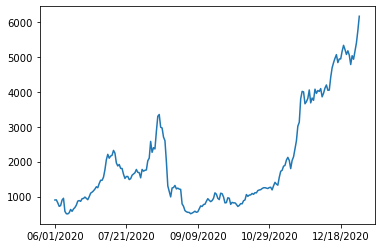

In [32]:
# result of moving mean
mean_case_tsa.loc['E'].plot()

<AxesSubplot:>

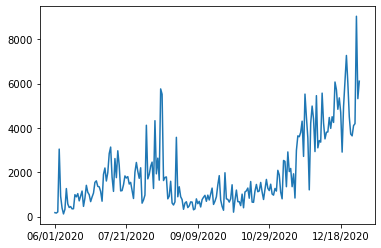

In [33]:
daily_case_tsa.loc['E'].plot()

In [34]:
# To compute using two dataframe that has the same structure, you can simply do the below. 
mean_ratio = mean_death_tsa / mean_case_tsa * 100
mean_ratio = mean_ratio.fillna(0)
mean_ratio.head()

,06/01/2020,06/02/2020,06/03/2020,06/04/2020,06/05/2020,06/06/2020,06/07/2020,06/08/2020,06/09/2020,06/10/2020,...,12/22/2020,12/23/2020,12/24/2020,12/25/2020,12/26/2020,12/27/2020,12/28/2020,12/29/2020,12/30/2020,12/31/2020
A,1.234568,0.888325,1.005025,1.005025,0.903226,0.777605,0.686106,1.002506,1.913876,1.463415,...,3.021583,3.044496,3.063830,3.917526,4.008667,5.142857,4.326450,4.281010,3.801843,3.244496
B,0.000000,0.000000,0.000000,0.000000,1.587302,1.562500,3.278689,7.142857,7.407407,9.523810,...,4.164524,4.366577,5.097546,4.780616,4.476629,4.508197,4.591492,4.398340,3.780378,3.018868
C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.375961,2.319588,2.416918,2.873031,2.869565,2.788104,3.045685,3.366584,3.840000,3.376206
D,0.000000,0.000000,0.000000,0.000000,0.909091,1.587302,1.587302,8.333333,14.285714,20.000000,...,6.052142,6.489945,7.172557,6.652361,7.274701,7.095344,7.358263,7.914764,6.854130,5.474453
E,0.833797,0.841453,0.978593,1.113984,1.062391,0.939042,0.813008,1.422156,1.608806,1.626248,...,1.292776,1.319057,1.421788,1.502389,1.483688,1.571863,1.546506,1.560717,1.490774,1.394350


<AxesSubplot:>

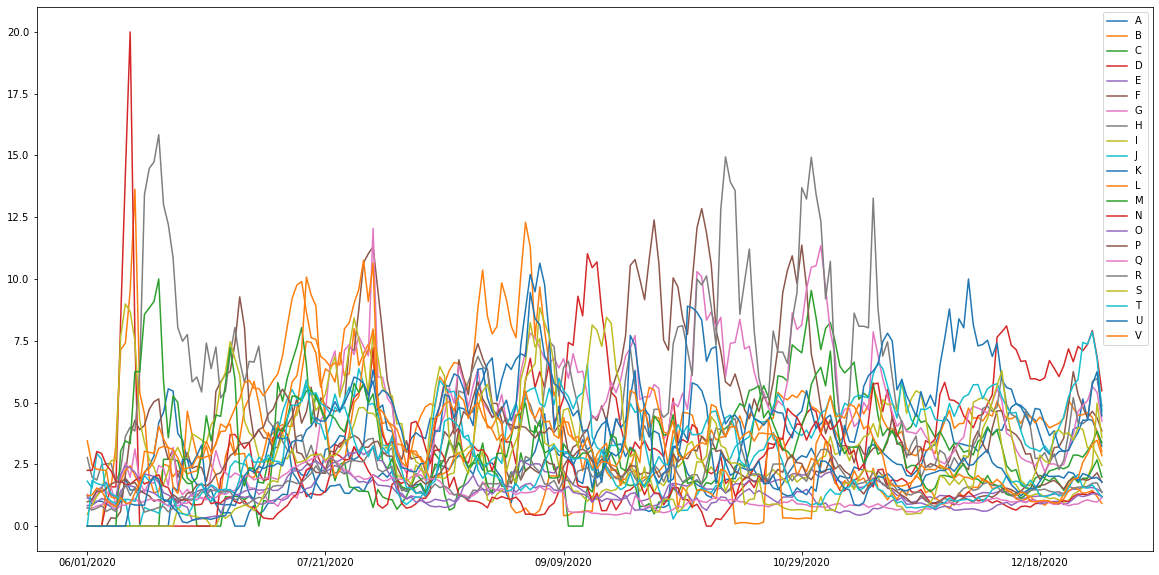

In [35]:
mean_ratio.transpose().plot(figsize=(20,10))

In [36]:
# Calculate 7 days mean for the ICU beds availability
mean_icu = icu_empty.copy(deep=True)

for col in icu_empty.columns:
    mean_icu[col] = icu_empty[focus_date_dict[col]].mean(axis=1)

mean_icu

,06/01/2020,06/02/2020,06/03/2020,06/04/2020,06/05/2020,06/06/2020,06/07/2020,06/08/2020,06/09/2020,06/10/2020,...,12/22/2020,12/23/2020,12/24/2020,12/25/2020,12/26/2020,12/27/2020,12/28/2020,12/29/2020,12/30/2020,12/31/2020
TSA,,,,,,,,,,,,,,,,,,,,,
A,29.926719,29.716023,29.297666,30.403291,30.534653,30.234287,30.473616,30.878885,32.099132,33.328407,...,6.986537,7.329378,7.768184,7.996148,7.852343,7.786458,7.743249,7.607766,7.183373,6.995089
B,19.467546,18.907370,19.438312,20.232839,19.744018,21.187692,23.960540,24.249979,24.777496,24.633398,...,7.353134,7.599840,7.317251,7.543802,7.888358,7.571286,8.103013,8.311963,8.759402,9.313738
C,44.347396,45.477917,43.172526,40.866026,40.656967,39.812987,37.366044,36.902723,35.474152,36.472836,...,23.687467,21.412334,19.004234,15.761213,14.267282,11.678186,9.592287,8.648629,8.896873,9.426176
D,37.303003,37.534710,38.623558,39.228356,39.098941,40.051322,41.463389,40.096335,37.458972,37.512779,...,6.377994,6.176904,6.294286,5.889314,5.010858,4.321226,3.130750,2.819208,3.019413,2.359172
E,27.207685,26.943709,26.540976,26.460199,26.107860,25.590270,24.693826,24.115896,23.479974,23.553295,...,4.092856,4.172126,4.170550,4.005713,3.927235,3.741094,3.621888,3.433849,3.246355,3.038031
F,65.610385,65.963485,66.659386,66.951971,67.490730,67.056330,66.447666,66.116797,65.431762,64.697635,...,10.505664,13.172941,13.204507,13.350279,12.621416,11.817544,11.657194,9.582203,6.539966,6.352041
G,29.810098,29.369551,29.236530,28.217778,28.278795,28.336403,27.632000,27.033728,26.684290,26.576167,...,8.239308,8.308422,8.042767,7.493044,7.249074,6.674499,6.766382,6.715119,6.422923,6.558066
H,23.641304,23.840580,23.598493,23.125830,23.076907,22.997276,20.926883,19.073711,17.210357,16.082456,...,18.552887,20.767325,22.380032,20.619355,20.388654,18.504766,18.019363,17.291247,15.077855,11.100840
I,16.048387,15.992556,16.031532,16.265481,16.128282,16.305036,15.835281,15.514097,15.825452,16.520380,...,17.894381,18.085475,18.697619,18.504233,17.711691,16.736428,16.263867,15.884869,15.420817,14.439338


<AxesSubplot:>

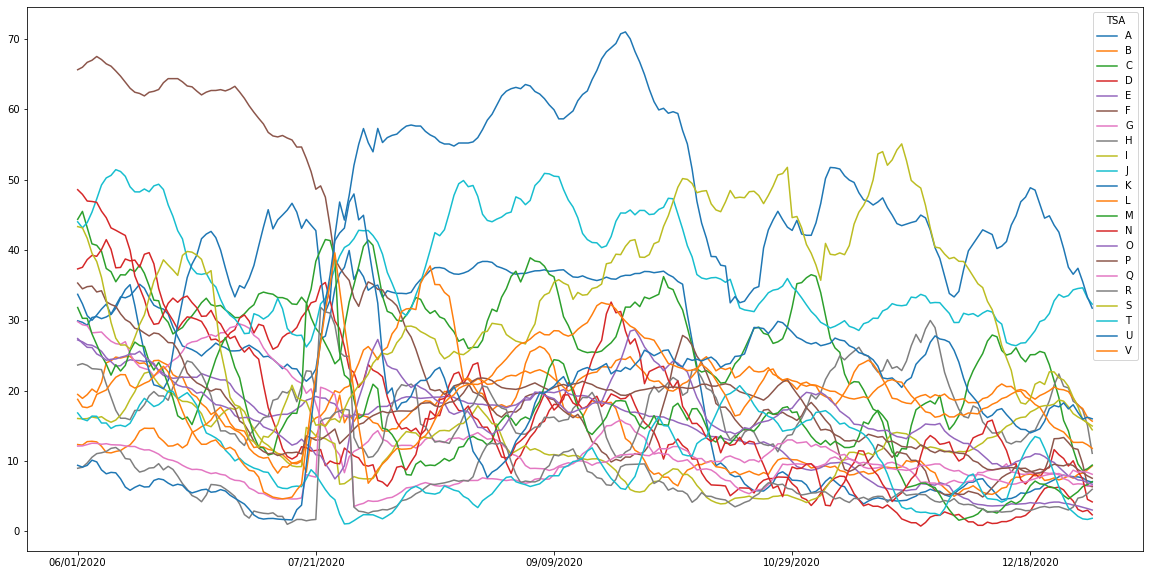

In [37]:
mean_icu.transpose().plot(figsize=(20, 10))

## 4. Correlation analysis: Examine the relationship between ICU availability and COVID-19 fatality

#### covered functions
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html?> df.corr()</a>
* <a href=https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html?> df.plot.scatter() </a>


In [38]:
for_plot = pd.DataFrame(columns=['case_fatality_ratio', 'empty_ICU_ratio'])

for idx, row in tqdm(mean_icu.iterrows(), total=mean_icu.shape[0]):
    for col in mean_icu.columns:
        for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)

for_plot

  0%|                                                     | 0/22 [00:00<?, ?it/s]/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

  5%|██                                           | 1/22 [00:03<01:18,  3.72s/it]/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
 59%|██████████████████████████                  | 13/22 [00:44<00:31,  3.48s/it]/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

 86%|██████████████████████████████████████      | 19/22 [01:03<00:09,  3.27s/it]/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
 91%|████████████████████████████████████████    | 20/22 [01:06<00:06,  3.33s/it]/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

 95%|██████████████████████████████████████████  | 21/22 [01:10<00:03,  3.35s/it]/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, col], 'empty_ICU_ratio': mean_icu.loc[idx,col]} ,ignore_index=True)
/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_26901/4253312446.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  for_plot = for_plot.append({'case_fatality_ratio': mean_ratio.loc[idx, 

100%|████████████████████████████████████████████| 22/22 [01:13<00:00,  3.32s/it]


,case_fatality_ratio,empty_ICU_ratio
0,1.234568,29.926719
1,0.888325,29.716023
2,1.005025,29.297666
3,1.005025,30.403291
4,0.903226,30.534653
...,...,...
4703,2.576336,12.656347
4704,2.922552,12.648829
4705,3.326935,12.668412
4706,3.469545,12.309327


<AxesSubplot:xlabel='case_fatality_ratio', ylabel='empty_ICU_ratio'>

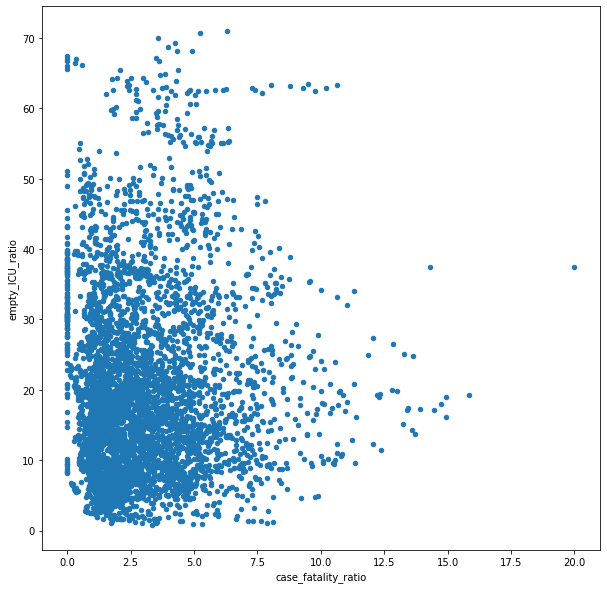

In [39]:
for_plot.plot.scatter('case_fatality_ratio', 'empty_ICU_ratio', figsize=(10,10))

In [40]:
for_plot.corr()

""
